# Lab3 Assignment: Training and Testing a classifier on a data set with tweets

Copyright: Vrije Universiteit Amsterdam, Faculty of Humanities, CLTL

In this assignment, you will build and apply classifiers using another data set with emotion labels from the 2017 *Wassa* workshop:

http://saifmohammad.com/WebPages/EmotionIntensity-SharedTask.html

### Reference
   Saif M. Mohammad and Felipe Bravo-Marquez. In Proceedings of the EMNLP 2017 Workshop on Computational Approaches to Subjectivity, Sentiment, and Social Media (WASSA), September 2017, Copenhagen, Denmark.

The texts are tweets and therefore a different genre than the spoken utterances from the conversations in the MELD data set. The data set is included in the distribution of this lab, where we aggregated all the training and test data in a single file. The notebook already includes the code for loading the CSV files in a Pandas dataframe.

In [1]:
import pandas as pd
from collections import Counter, OrderedDict
import numpy as np
import nltk
from nltk.corpus import stopwords
import sklearn
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import lab3_util as util

## 1. Loading the tweet data set

In [2]:
filepath = './data/wassa/training/all.train.tsv'
dftweets_train = pd.read_csv(filepath, sep='\t')
dftweets_train.head()

,ID,Tweet,Label,Score
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [3]:
dftweets_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3613 entries, 0 to 3612
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      3613 non-null   int64  
 1   Tweet   3613 non-null   object 
 2   Label   3613 non-null   object 
 3   Score   3613 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 113.0+ KB


In [4]:
##### Test data
filepath = './data/wassa/testing/all.test.tsv'
dftweets_test = pd.read_csv(filepath, sep='\t')

#### 1.1 Extracting the texts and labels for the training and testing [1 point]

In [5]:
# HERE COMES THE CODE TO EXTRACT THE TRAINING TEXTS AND LABELS
x_train_raw = dftweets_train['Tweet'].to_numpy()
y_train = dftweets_train['Label'].to_numpy()

In [6]:
# HERE COMES THE CODE TO EXTRACT THE TEST TEXTS AND LABELS
x_test_raw = dftweets_test['Tweet'].to_numpy()
y_test = dftweets_test['Label'].to_numpy()

#### 1.2 Analysing the data [1 point]

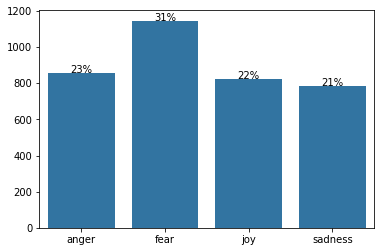

In [7]:
# HERE COMES THE CODE TO GENERATE A BAR CHART FOR THE TRAIN DATA
train_counts = Counter(y_train)
train_counts_sorted = OrderedDict(sorted(train_counts.items()))
util.plot_labels_with_counts(list(train_counts_sorted.keys()), list(train_counts_sorted.values()))

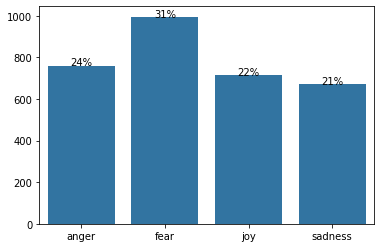

In [8]:
# HERE COMES THE CODE TO GENERATE A BAR CHART FOR THE TEST DATA 
test_counts = Counter(y_test)
test_counts_sorted = OrderedDict(sorted(test_counts.items()))
util.plot_labels_with_counts(list(test_counts_sorted.keys()), list(test_counts_sorted.values()))

HERE COME YOUR COMMENTS ON THE DISTRIBUTION OF THE TRAIN AND TEST DATA AND A COMPARISON WITH THE DISTRIBUTION IN MELD.

### 2. Creating and testing a bag-of-words SVM classifier for the Tweets data

#### 2.1 Representing the tweets as BoW vectors [1 point]

In [11]:
# HERE COMES THE CODE TO CREATE A BOW REPRESENTATION WITH TF-IDF WEIGHTS FOR THE TRAINING
frequency_threshold = 5
utterance_vec =CountVectorizer(min_df=frequency_threshold, # If a token appears fewer times than this, across all documents, it will be ignored
                             tokenizer=nltk.word_tokenize, # we use the nltk tokenizer
                             stop_words=stopwords.words('english')) # stopwords are removed

tfidf_transformer = TfidfTransformer()
x_train = tfidf_transformer.fit_transform(utterance_vec.fit_transform(x_train_raw))

c:\Users\xelfj\AppData\Local\Programs\Python\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [12]:
# HERE COMES THE CODE TO REPRESENT THE TEST DATA ACCORDING TO THE BOW VECTORIZER
x_test = tfidf_transformer.transform(utterance_vec.transform(x_test_raw))

#### 2.2 Training and testing the BOW SVM Classifier [1 point]

In [13]:
# HERE COMES THE CODE TO TRAIN AN SVM CLASSIFIER WITH THE TRAINING DATA
svm_linear_clf = svm.LinearSVC(max_iter=2000)
svm_linear_clf.fit(x_train, y_train)

LinearSVC(max_iter=2000)

In [15]:
# HERE COMES THE CODE TO APPLY THE CLASSIFIER TO THE TWEET TEST SET
y_pred = svm_linear_clf.predict(x_test)

----------------------------------------------------------------
Report on SVM with Word frequency threshold 5
              precision    recall  f1-score   support

       anger  0.8046768 0.7697368 0.7868191       760
        fear  0.7713178 0.8000000 0.7853971       995
         joy  0.8609929 0.8501401 0.8555321       714
     sadness  0.7772861 0.7830609 0.7801628       673

    accuracy                      0.8004456      3142
   macro avg  0.8035684 0.8007345 0.8019778      3142
weighted avg  0.8010433 0.8004456 0.8005577      3142

---------------------------------------------------------------
Confusion matrix of SVM
[[585  97  28  50]
 [ 71 796  46  82]
 [ 21  67 607  19]
 [ 50  72  24 527]]


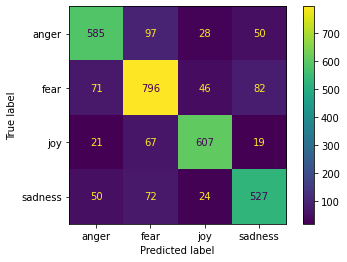

In [19]:
# HERE COMES THE CODE TO GENERATE A CLASSIFICATION REPORT AND CONFUSION MATRIX
report = classification_report(y_test,y_pred,digits = 7, target_names = svm_linear_clf.classes_)
print('----------------------------------------------------------------')
print('Report on SVM with Word frequency threshold', frequency_threshold)
print(report)

print("---------------------------------------------------------------")
print("Confusion matrix of SVM")
cf_matrix_svm = sklearn.metrics.confusion_matrix(y_test,y_pred)
print(cf_matrix_svm)
import matplotlib.pyplot as plt
display = ConfusionMatrixDisplay(confusion_matrix=cf_matrix_svm, display_labels=svm_linear_clf.classes_)
display.plot()

#### 2.3 Analyse the test results [1 point]

HERE COMES YOUR ANALYSIS OF THE RESULT.

## 3. Comparison of the results [2 points]

COMPARE THE RESULTS WITH THE SVM CLASSIFIER BUILT FROM THE MELD DATA

# End of The assignment